In [75]:
!pip install mtcnn

In [76]:
!pip install keras_facenet

**Importing Necessary Libraries**

In [77]:
from mtcnn import MTCNN  #pretrined model used to detect faces in images
from keras_facenet import FaceNet #to generate festure vectors for face verified
import cv2  #reading and resizing images
import numpy as np  #for handling images data and numerical operations
import torch  #to speed up process
import matplotlib.pyplot as plt #for visualization
from scipy.spatial.distance import cosine #for cosine distance between teo vectors
from skimage import io #loading images from local path or urls
import warnings #for clear output
warnings.filterwarnings('ignore') #ignore irrelevant warning
plt.style.use('dark_background') #aplly dark theme for plots


**Images**

In [78]:
image1_CR7='/content/Images for face /ronaldo1.jpg'
image2_CR7='/content/Images for face /ronaldo2.jpg'

image3_Messi='/content/Images for face /messi1.jpg'
image4_Messi='/content/Images for face /messi2.jpg'

image5_Rohit='/content/Images for face /rohit.jpg'
image6_Rohit='/content/Images for face /rohit2.jpg'

image7_Bellingam='/content/Images for face /bellingam1.jpg'
image8_Bellingam='/content/Images for face /bellingam2.jpg'

image_list = [image1_CR7, image2_CR7, image3_Messi,image4_Messi, image5_Rohit, image6_Rohit, image7_Bellingam, image8_Bellingam ]

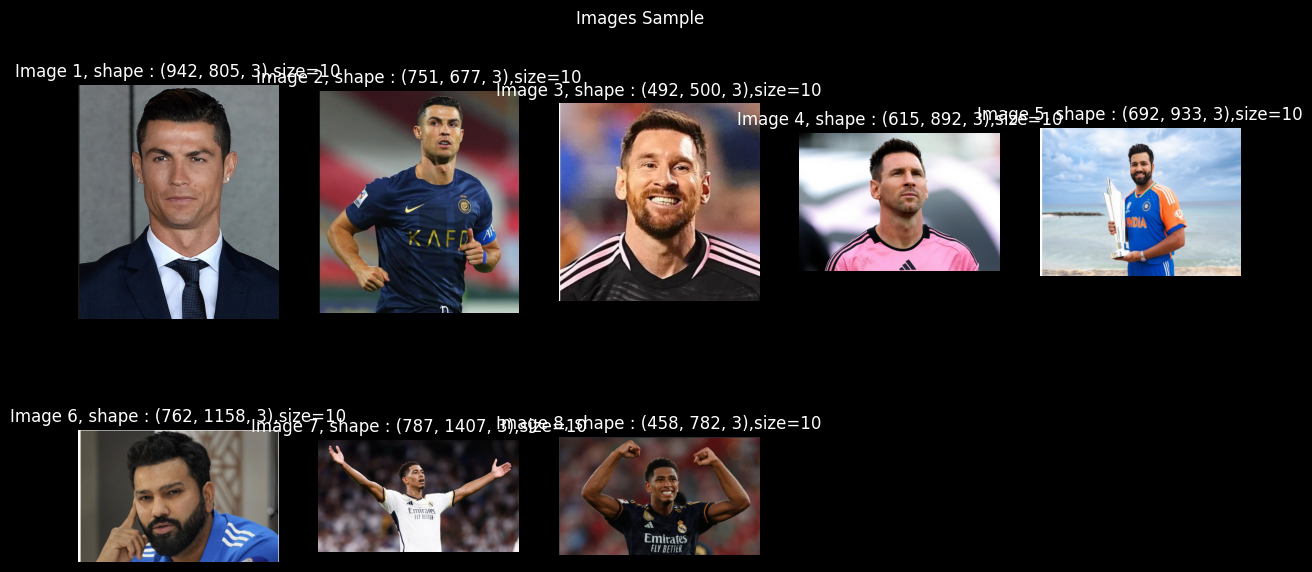

In [79]:
plt.figure(figsize=[15,7])


for i in range(len(image_list)):
  plt.subplot(2,5,i+1)
  plt.suptitle('Images Sample')
  img = plt.imread(image_list[i])
  plt.imshow(img)
  plt.axis('off')
  plt.title(f"Image {i+1}, shape : {img.shape },size=10")

In [80]:
class Color:
  GREEN = '\033[92m'
  BLUE = '\033[94m'
  RED = '\033[91m'
  BOLD = '\033[1m'
  END = '\033[0m'


In [81]:
def Face_detection( image = None, model = MTCNN(), color='red',url=None, size=10 ):
  print(f'{Color.BOLD}The process has been started for detection faces..')
  plt.style.use('dark_background')

  if url:
    image = io.imread(url)

  if image:
    img = plt.imread(image)

  model = model
  coordinates = model.detect_faces(img)

  plt.style.use('dark_background')
  plt.figure(figsize=[12,6])

  plt.subplot(1,2,1)
  plt.imshow(img)


  plt.title('Face Detection')
  plt.axis('off')
  ax = plt.gca()


  for coordinate in coordinates:
    print('{}The box coordinates :{} {}\n{} The  confidence: {} {}\nThe key points :{} {}'.format(Color.GREEN, Color.END, coordinate['box'], Color.RED, Color.END, coordinate['confidence'], Color.BLUE, Color.END, coordinate['keypoints']))

    x,y,width,height = coordinate['box']
    rect = plt.Rectangle((x,y), width, height, fill=False, color=color)
    ax.add_patch(rect)

  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.title('Key points')
  plt.axis('off')

  for coordinate in coordinates:
    left_eye = coordinate['keypoints']['left_eye']
    right_eye = coordinate['keypoints']['right_eye']
    nose = coordinate['keypoints']['nose']
    mouth_left = coordinate['keypoints']['mouth_left']
    mouth_right = coordinate['keypoints']['mouth_right']

    plt.scatter(left_eye[0], left_eye[1], color='red', s=size)
    plt.scatter(right_eye[0], right_eye[1], color='red', s=size)
    plt.scatter(nose[0], nose[1], color='red', s=size)
    plt.scatter(mouth_left[0], mouth_left[1], color='red', s=size)
    plt.scatter(mouth_right[0], mouth_right[1], color='red', s=size)

  plt.show()
  print('--'*30)


The process has been started for detection faces..
The box coordinates : [259, 150, 302, 395]
 The  confidence:  0.985558271408081
The key points : 


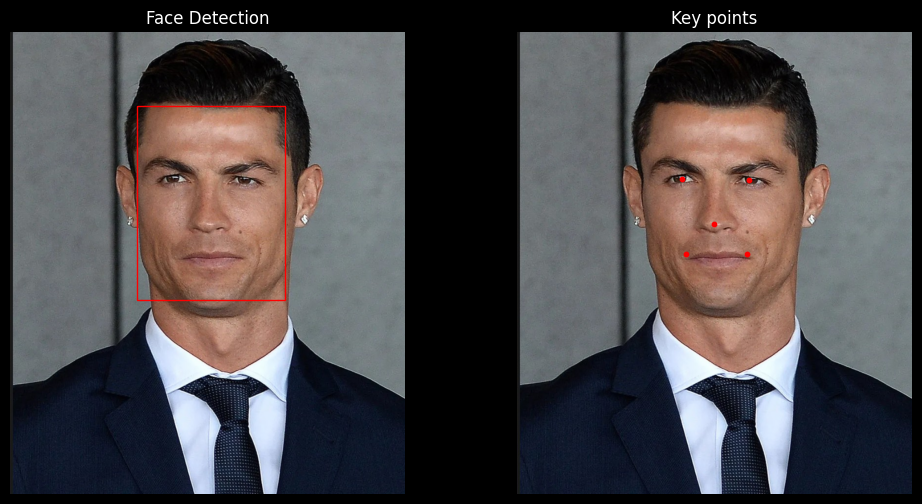

------------------------------------------------------------
The process has been started for detection faces..
The box coordinates : [353, 48, 128, 174]
 The  confidence:  0.9993521571159363
The key points : 


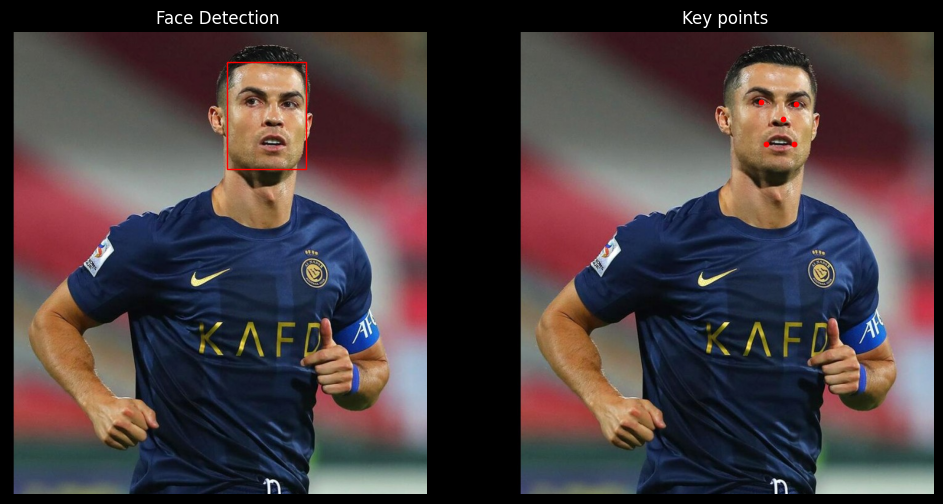

------------------------------------------------------------
The process has been started for detection faces..
The box coordinates : [177, 57, 178, 244]
 The  confidence:  0.9940582513809204
The key points : 


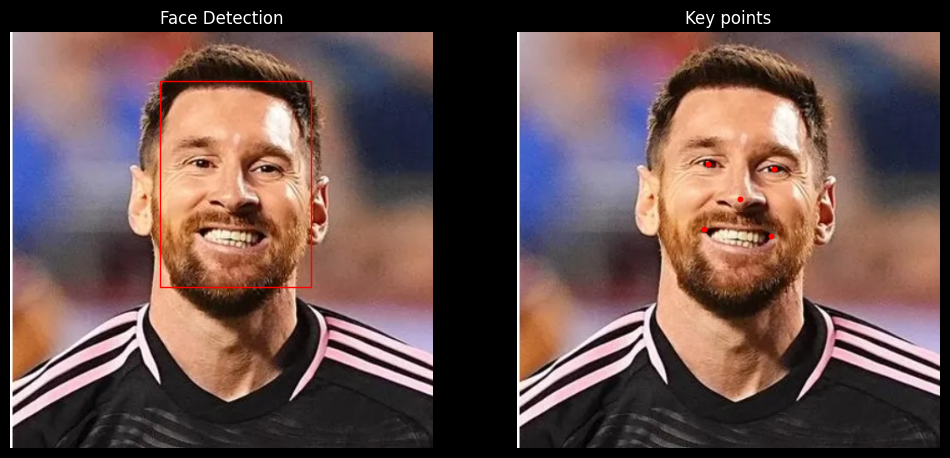

------------------------------------------------------------
The process has been started for detection faces..
The box coordinates : [366, 81, 198, 261]
 The  confidence:  0.9999995231628418
The key points : 


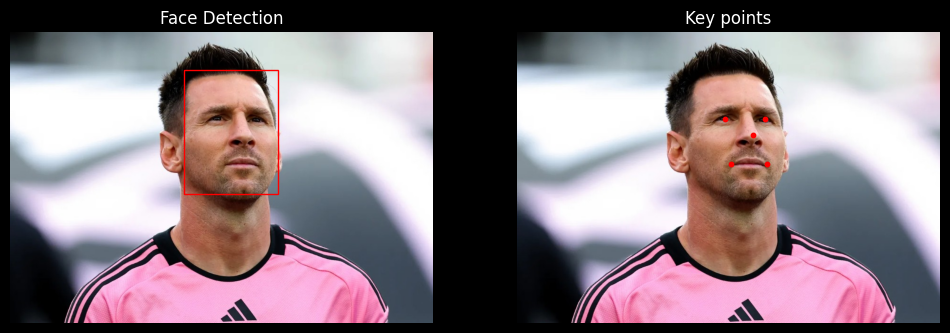

------------------------------------------------------------
The process has been started for detection faces..
The box coordinates : [418, 118, 97, 136]
 The  confidence:  0.999987006187439
The key points : 


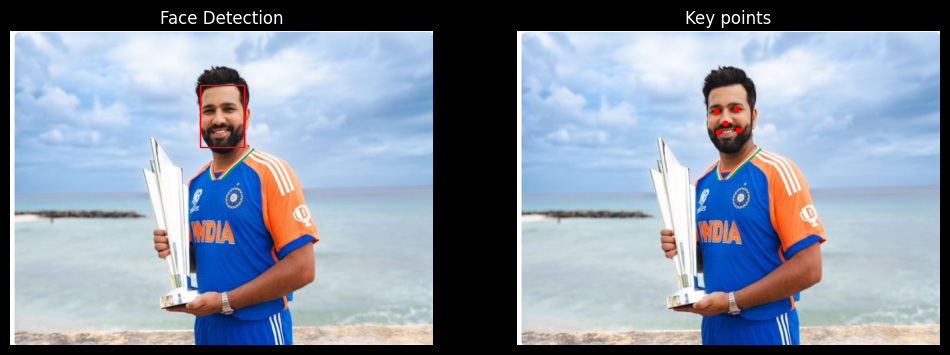

------------------------------------------------------------
The process has been started for detection faces..
The box coordinates : [324, 192, 359, 464]
 The  confidence:  0.9999686479568481
The key points : 


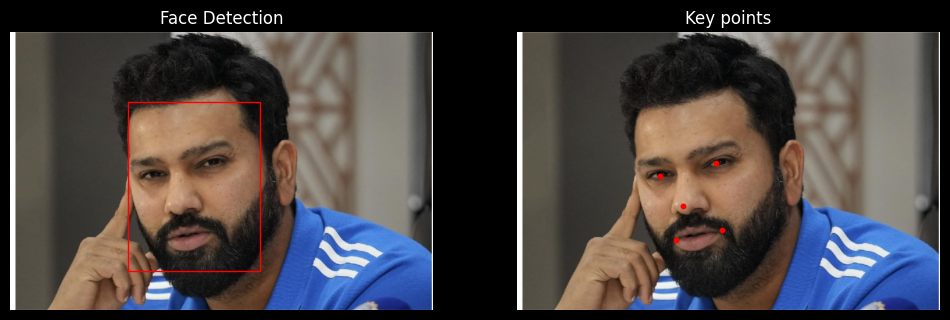

------------------------------------------------------------
The process has been started for detection faces..
The box coordinates : [632, 181, 118, 156]
 The  confidence:  0.9999867677688599
The key points : 


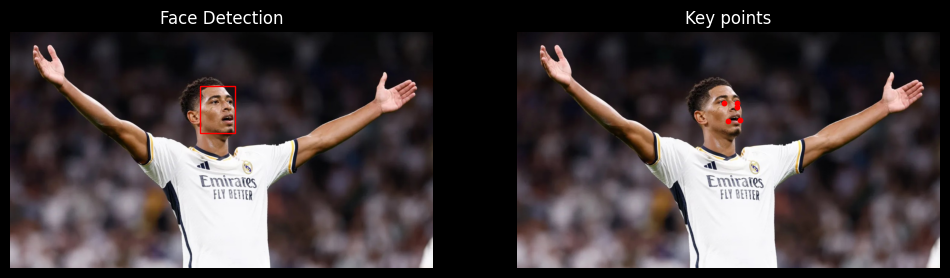

------------------------------------------------------------
The process has been started for detection faces..
The box coordinates : [364, 121, 96, 127]
 The  confidence:  0.9957815408706665
The key points : 


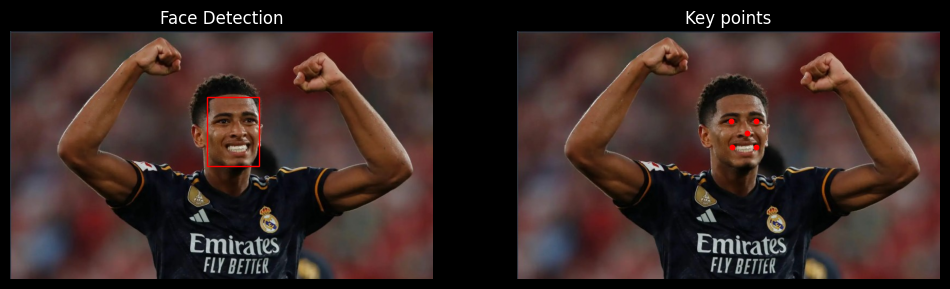

------------------------------------------------------------


In [82]:
for image in image_list:
  Face_detection(image=image, color='red', size=10)

In [83]:
def reading_img(img_path):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  return img

In [84]:
def Face_detection_faceNet(Img, margin=0.2, confidence_threshold=0.90):
    model = MTCNN()
    detections = model.detect_faces(Img)

    if detections and detections[0]['confidence'] >= confidence_threshold:
        x, y, width, height = detections[0]['box']

        x1 = max(x - int(margin * width), 0)
        y1 = max(y - int(margin * height), 0)
        x2 = min(x + width + int(margin * width), Img.shape[1])
        y2 = min(y + height + int(margin * height), Img.shape[0])

        face_box = Img[y1:y2, x1:x2]
        image_with_face_detection = cv2.resize(face_box, (160, 160))

        return image_with_face_detection
    else:
        print(f"{Color.RED}Face detection failed or confidence below threshold ({confidence_threshold}){Color.END}")
        return None





In [85]:
facenet_model = FaceNet()

def Embedding(fimage_with_face_detection):
  model = FaceNet()
  embeddings = generate_all_embeddings(image_list)
  results = compare_all_pairs(embeddings)
  plot_comparison_matrix(results, image_list)

In [86]:
def Similarity_Measurement(embedding_vector1, embedding_vector2, threshold=0.7):
  Distance = cosine(embedding_vector1, embedding_vector2)
  scan_distance = Distance < threshold
  return scan_distance

In [87]:

# 1. Function to generate embeddings for all images
def generate_all_embeddings(image_paths):
    embeddings = {}
    for path in image_paths:
        img = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
        face = Face_detection_faceNet(img)
        if face is not None:
            embeddings[path] = Embedding(face)
        else:
            embeddings[path] = None
            print(f"{Color.RED}No face detected in {path}{Color.END}")
    return embeddings

# 2. Function to compare all image pairs
def compare_all_pairs(embeddings, threshold=0.6):
    paths = list(embeddings.keys())
    n = len(paths)
    results = np.zeros((n, n), dtype=bool)  # Matrix to store results

    print(f"\n{Color.BOLD}=== Pairwise Face Comparison Results ==={Color.END}")
    for i in range(n):
        for j in range(i + 1, n):  # Avoid redundant comparisons (i vs j == j vs i)
            emb1 = embeddings[paths[i]]
            emb2 = embeddings[paths[j]]

            if emb1 is None or emb2 is None:
                results[i][j] = False
                continue

            similarity = cosine(emb1, emb2) < threshold
            results[i][j] = similarity

            # Print comparison result
            img1_name = paths[i].split('/')[-1]
            img2_name = paths[j].split('/')[-1]
            status = "SAME PERSON" if similarity else "DIFFERENT PEOPLE"
            color = Color.GREEN if similarity else Color.RED
            print(f"{color}[{img1_name}] vs [{img2_name}]: {status}{Color.END}")

    return results

# 3. Function to visualize the comparison matrix
# def plot_comparison_matrix(results, image_paths):
#     n = len(image_paths)
#     plt.figure(figsize=(10, 8))
#     plt.imshow(results, cmap='RdYlGn', interpolation='nearest')
#     plt.title("Face Comparison Matrix (Green = Match)", fontsize=14)
#     plt.xticks(np.arange(n), [f"Img {i+1}" for i in range(n)], rotation=45)
#     plt.yticks(np.arange(n), [f"Img {i+1}" for i in range(n)])

#     # Add annotations (✔ or ✖)
#     for i in range(n):
#         for j in range(n):
#             if i < j:
#                 plt.text(j, i, "✔" if results[i][j] else "✖",
#                          ha="center", va="center", color="black", fontsize=12)

#     plt.colorbar()
#     plt.show()

In [88]:

def Showing(image_path1, image_path2):
  print(f'{Color.BOLD}The process has been started for faces comparison...')

  checking = Comparison_Faces(img1=image_path1, img2=image_path2)

  if checking:
    print(f'Result: {Color.GREEN} The person in both images is  {Color.BOLD} same {Color.END}') # Changed Color.End to Color.END
  else:
    print(f'Result: {Color.RED} The person in both images is not  {Color.BOLD} same {Color.END}') # Changed Color.End to Color.END

    print('--'*40)


In [89]:
def evaluate_accuracy(test_pairs, threshold=0.7):
    correct = 0
    total = len(test_pairs)

    for img1, img2, actual_label in test_pairs:
        predicted_label = Comparison_Faces(img1, img2)
        predicted_label = 1 if predicted_label else 0

        if predicted_label == actual_label:
            correct += 1

    accuracy = correct / total
    print(f"\n{Color.BOLD}{Color.BLUE}Accuracy of Face Verification System: {accuracy * 100:.2f}%{Color.END}")


The process has been started for faces comparison...


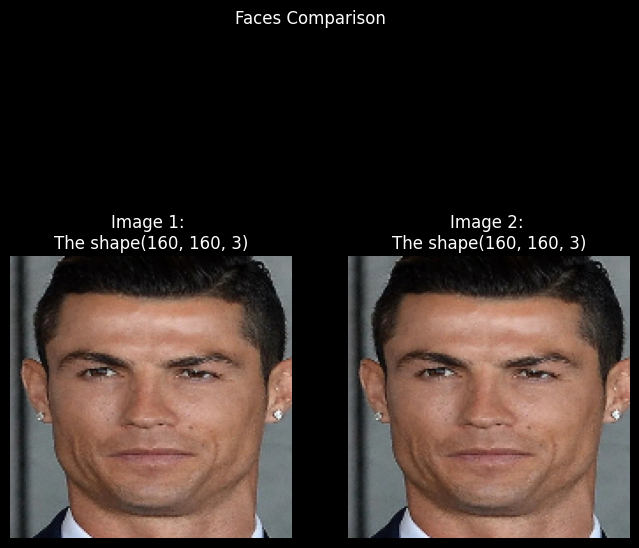

In [ ]:
for img in image_list:
  Showing(image_list[0], img)